In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

import missingno as msno

2023-10-26 13:48:02.465170: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv("../data/Volve/VolveNN.csv")

In [3]:
df

,WELL,DEPTH,GR,RHOB,NPHI,PEF,DT,DTS,RT
0,15/9-F-11 A,2582.9,55.1860,2.3260,0.3520,6.8290,107.0670,261.0360,0.7810
1,15/9-F-11 A,2583.0,57.0150,2.3250,0.3640,6.8100,107.8100,260.1610,0.7720
2,15/9-F-11 A,2583.1,58.9230,2.3210,0.3700,6.7760,108.2310,261.0670,0.7050
3,15/9-F-11 A,2583.2,57.3220,2.3120,0.3670,6.7220,108.4280,262.5100,0.6540
4,15/9-F-11 A,2583.3,53.0540,2.2980,0.3500,6.6380,108.2220,263.3600,0.6110
...,...,...,...,...,...,...,...,...,...
24106,15/9-F-1 A,3641.4,120.1702,2.6282,0.2050,7.1941,74.0343,131.1953,2.6042
24107,15/9-F-1 A,3641.5,121.1039,2.6320,0.2036,7.1741,74.1741,131.6474,2.5379
24108,15/9-F-1 A,3641.6,120.5899,2.6344,0.2009,7.1429,74.3111,132.0925,2.5140
24109,15/9-F-1 A,3641.7,120.4854,2.6337,0.1973,7.0911,74.4395,132.4320,2.4805


<AxesSubplot:>

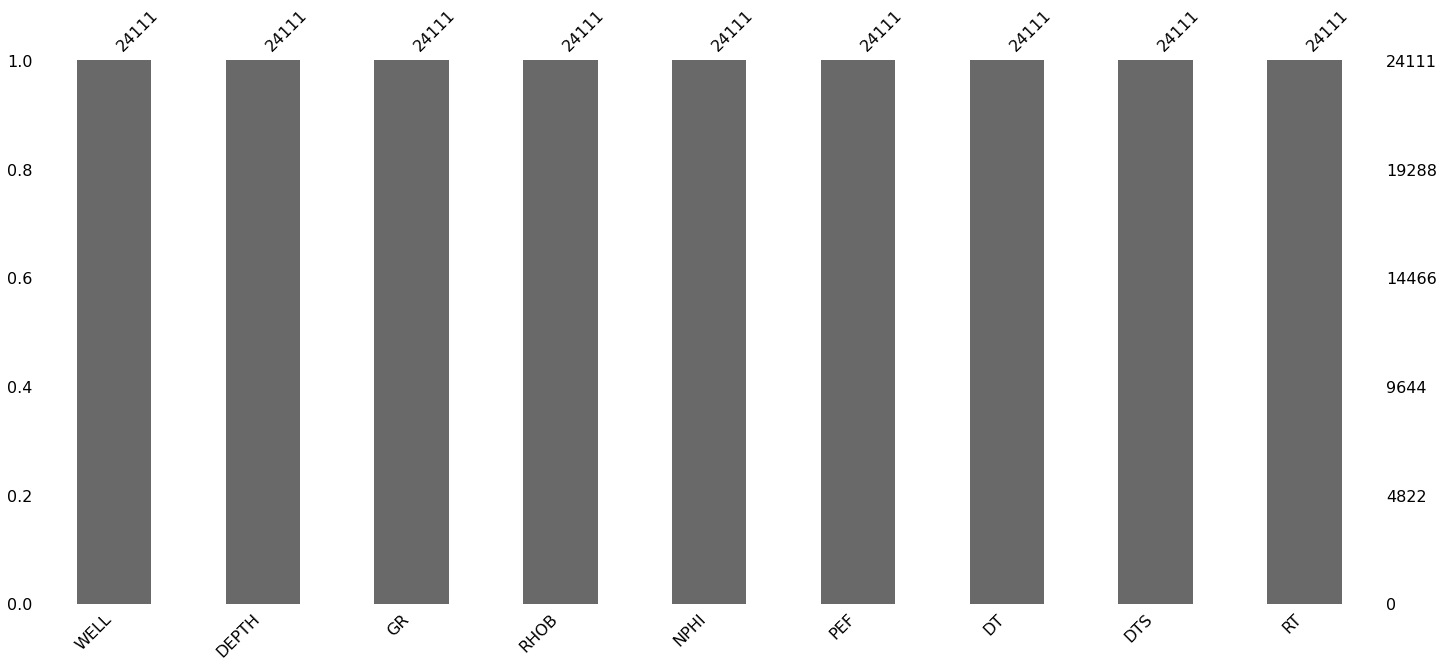

In [4]:
msno.bar(df)

In [5]:
df.describe()

,DEPTH,GR,RHOB,NPHI,PEF,DT,DTS,RT
count,24111.00000,24111.000000,24111.000000,24111.000000,24111.000000,24111.000000,24111.000000,24111.000000
mean,3155.72970,39.451638,2.478318,0.164214,7.015495,77.040413,142.740826,53.625222
std,298.56756,52.785853,0.142745,0.091454,1.182256,13.236181,35.143429,1640.140700
min,2582.90000,0.852000,1.980600,0.010000,4.297800,53.165000,83.574000,0.103000
25%,2908.05000,10.140250,2.408150,0.099000,6.094400,67.434250,121.526950,1.504850
50%,3174.80000,29.648000,2.529000,0.141400,7.362000,73.507100,132.383600,2.859500
75%,3388.30000,47.540700,2.579000,0.208000,7.953000,84.958950,147.026500,4.535350
max,3723.10000,1124.403000,3.051700,0.593200,13.841000,126.827000,343.944000,62290.770000


In [6]:
X = df[['DTS', 'GR', 'NPHI', 'PEF', 'DT']]
y = df['RHOB']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
len(X_train), len(X_test)

(16877, 7234)

In [16]:
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile model
model.compile(loss='mae',
             optimizer='Adam',
             metrics='mae')

# Fit the model
history = model.fit(X_train, y_train, epochs=30)

Epoch 1/30
528/528 [==============================] - 2s 1ms/step - loss: 3.0492 - mae: 3.0492
Epoch 2/30
528/528 [==============================] - 1s 2ms/step - loss: 0.1638 - mae: 0.1638
Epoch 3/30
528/528 [==============================] - 1s 1ms/step - loss: 0.1453 - mae: 0.1453
Epoch 4/30
528/528 [==============================] - 1s 1ms/step - loss: 0.1386 - mae: 0.1386
Epoch 5/30
528/528 [==============================] - 1s 1ms/step - loss: 0.1183 - mae: 0.1183
Epoch 6/30
528/528 [==============================] - 1s 1ms/step - loss: 0.1220 - mae: 0.1220
Epoch 7/30
528/528 [==============================] - 1s 2ms/step - loss: 0.1153 - mae: 0.1153
Epoch 8/30
528/528 [==============================] - 1s 1ms/step - loss: 0.1058 - mae: 0.1058
Epoch 9/30
528/528 [==============================] - 1s 2ms/step - loss: 0.0988 - mae: 0.0988
Epoch 10/30
528/528 [==============================] - 1s 1ms/step - loss: 0.0993 - mae: 0.0993
Epoch 11/30
528/528 [============================

Text(0, 0.5, 'Mean Absolute Error (MAE)')

<Figure size 720x576 with 0 Axes>

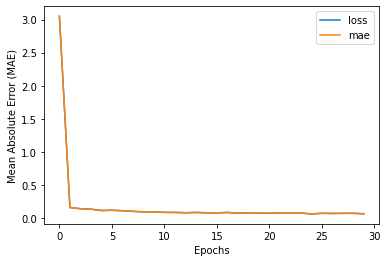

In [17]:
plt.figure(figsize=(10, 8))
pd.DataFrame(history.history).plot()
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')


In [18]:
y_pred = model.predict(X_test)

227/227 [==============================] - 0s 1ms/step


In [19]:
mae_1 = tf.keras.metrics.mae(y_test, tf.squeeze(y_pred)).numpy()
rmse_1 = np.sqrt(tf.keras.metrics.mse(y_test, tf.squeeze(y_pred)).numpy())
mae_1, rmse_1

(0.058553956, 0.08680684)

In [20]:
def create_scatter_comparison(ytrue, ypreds):
    minscale = min(ytrue.min(), ypreds.min())*0.95
    maxscale = max(ytrue.max(), ypreds.max())*1.05
    plt.figure(figsize=(10, 10))
    plt.scatter(ytrue, ypreds)
    
    # Create a 1:1 relationship line
    line_points = np.linspace(minscale, maxscale, 100) 
    plt.plot(line_points, line_points, c='red')
    
    plt.xlim(minscale, maxscale)
    plt.ylim(minscale, maxscale)
    plt.xlabel('Actual Measurements')
    plt.ylabel('Predicted Measurements')
    plt.show()

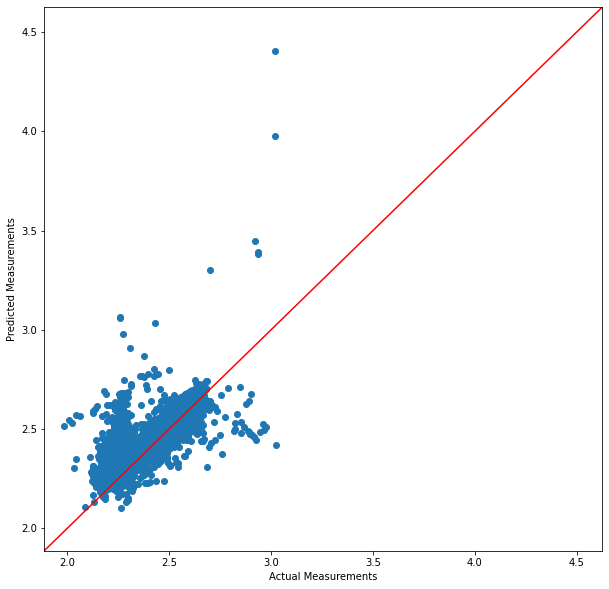

(1.5, 3.5)

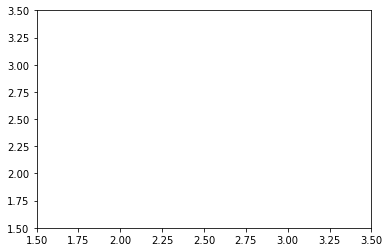

In [21]:
create_scatter_comparison(y_test, y_pred)
plt.xlim(1.5, 3.5)
plt.ylim(1.5, 3.5)

# Improving Model With Normalisation

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

In [34]:
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [43]:
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile model
model.compile(loss='mae',
             optimizer='Adam',
             metrics='mae')

# Fit the model
history = model.fit(X_train_s, y_train, epochs=30)

Epoch 1/30
528/528 [==============================] - 2s 2ms/step - loss: 0.7282 - mae: 0.7282
Epoch 2/30
528/528 [==============================] - 1s 1ms/step - loss: 0.1626 - mae: 0.1626
Epoch 3/30
528/528 [==============================] - 1s 1ms/step - loss: 0.0774 - mae: 0.0774
Epoch 4/30
528/528 [==============================] - 1s 1ms/step - loss: 0.0480 - mae: 0.0480
Epoch 5/30
528/528 [==============================] - 1s 1ms/step - loss: 0.0378 - mae: 0.0378
Epoch 6/30
528/528 [==============================] - 1s 1ms/step - loss: 0.0362 - mae: 0.0362
Epoch 7/30
528/528 [==============================] - 1s 1ms/step - loss: 0.0356 - mae: 0.0356
Epoch 8/30
528/528 [==============================] - 1s 1ms/step - loss: 0.0352 - mae: 0.0352
Epoch 9/30
528/528 [==============================] - 1s 1ms/step - loss: 0.0349 - mae: 0.0349
Epoch 10/30
528/528 [==============================] - 1s 1ms/step - loss: 0.0348 - mae: 0.0348
Epoch 11/30
528/528 [============================

<AxesSubplot:>

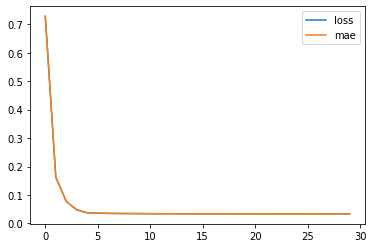

In [44]:
pd.DataFrame(history.history).plot()

In [45]:
y_pred = model.predict(X_test_s)

227/227 [==============================] - 0s 1ms/step


In [46]:
mae_1 = tf.keras.metrics.mae(y_test, tf.squeeze(y_pred)).numpy()
rmse_1 = np.sqrt(tf.keras.metrics.mse(y_test, tf.squeeze(y_pred)).numpy())
mae_1, rmse_1

(0.03342951, 0.060196143)

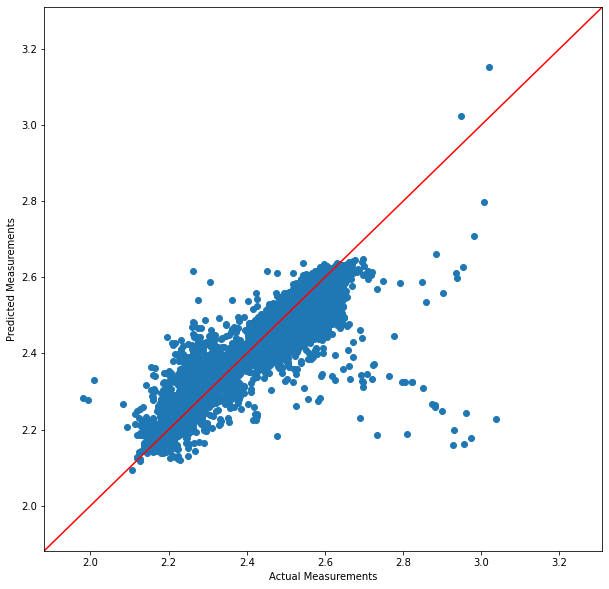

(1.5, 3.5)

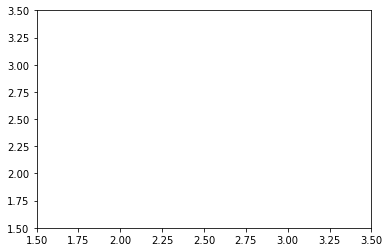

In [47]:
create_scatter_comparison(y_test, y_pred)
plt.xlim(1.5, 3.5)
plt.ylim(1.5, 3.5)

In [50]:
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile model
model.compile(loss='mae',
             optimizer='Adam',
             metrics='mae')

# Fit the model
history = model.fit(X_train_s, y_train, epochs=200, validation_data=(X_test_s, y_test))

NameError: name 'y_train_s' is not defined

<AxesSubplot:>

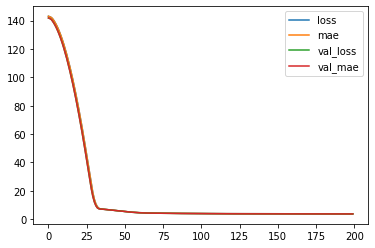

In [35]:
pd.DataFrame(history.history).plot()

In [36]:
y_pred_1 = model.predict(X_test_s)

40/40 [==============================] - 0s 850us/step


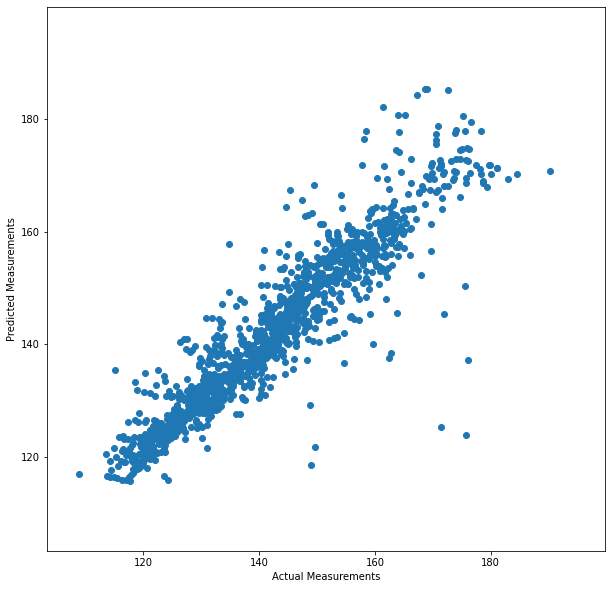

In [37]:
create_scatter_comparison(y_test, y_pred_1)

In [51]:
# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile model
model_2.compile(loss='mae',
             optimizer='SGD',
             metrics='mae')

# Fit the model
history = model_2.fit(X_train_s, y_train, epochs=100,validation_data=(X_test, y_test))

Epoch 1/100
528/528 [==============================] - 2s 2ms/step - loss: 41.5552 - mae: 41.5552 - val_loss: 5592.0337 - val_mae: 5592.0337
Epoch 2/100
528/528 [==============================] - 1s 2ms/step - loss: 15.2828 - mae: 15.2828 - val_loss: 6584.9453 - val_mae: 6584.9453
Epoch 3/100
528/528 [==============================] - 1s 2ms/step - loss: 13.3521 - mae: 13.3521 - val_loss: 10321.4785 - val_mae: 10321.4785
Epoch 4/100
528/528 [==============================] - 1s 2ms/step - loss: 12.7324 - mae: 12.7324 - val_loss: 9871.4062 - val_mae: 9871.4062
Epoch 5/100
528/528 [==============================] - 1s 2ms/step - loss: 12.1478 - mae: 12.1478 - val_loss: 9715.2998 - val_mae: 9715.2998
Epoch 6/100
528/528 [==============================] - 1s 2ms/step - loss: 11.8029 - mae: 11.8029 - val_loss: 9559.2842 - val_mae: 9559.2842
Epoch 7/100
528/528 [==============================] - 1s 2ms/step - loss: 11.7332 - mae: 11.7332 - val_loss: 9617.8633 - val_mae: 9617.8633
Epoch 8/100

<AxesSubplot:>

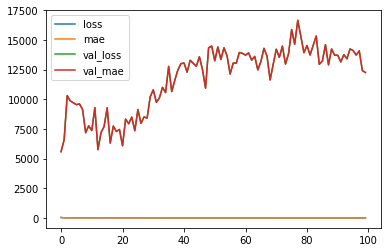

In [52]:
pd.DataFrame(history.history).plot()

In [55]:
y_pred_2 = model_2.predict(X_test_s)

227/227 [==============================] - 0s 994us/step


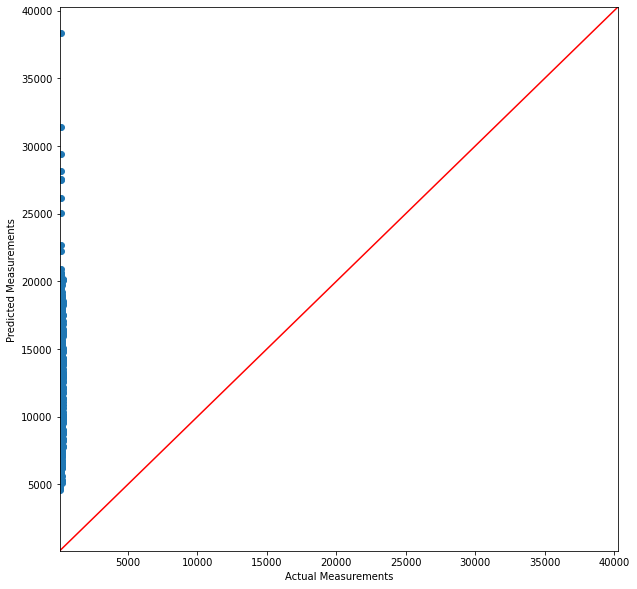

In [54]:
create_scatter_comparison(y_test, y_pred_2)